# Статистический анализ судейства в хастле

In [1]:
import scripts.pipeline as pipeline
import scripts.analisys as analisys
import scripts.model_preparation as model_preparation
import scripts.model as model
import scripts.model_interpretation as model_interpretation

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 500)

## Анализ результатов

#### Загрузим данные по крестам

In [3]:
raw_crosses = pipeline.get_raw_crosses('dataset/crosses.csv')
raw_crosses.head()

/home/aklyukvin/go/src/github.com/Sovianum/hustleScrape/dataanalisys/scripts/pipeline.py:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.passed[df.passed == 0] = -1


,competitor_id,competition_id,judge_name,category,phase,passed
0,10655,NORD CUP 2020_2020-03-13,ирина кудрявцева,dnd beginner,16,1
1,10655,NORD CUP 2020_2020-03-13,кудрявцев михаил,dnd beginner,16,1
2,10655,NORD CUP 2020_2020-03-13,лебедев сергей,dnd beginner,16,1
3,10655,NORD CUP 2020_2020-03-13,александр милованов,dnd beginner,16,1
4,10486,NORD CUP 2020_2020-03-13,александр милованов,dnd beginner,16,1


In [4]:
raw_crosses.competition_id.unique()

array(['NORD CUP 2020_2020-03-13', "Rock'n'Dance CUP 2020_2020-03-22",
       'Free your mind_2020-07-04', 'Кубок Лета_2020-08-08',
       'SIBERIAN JAM_2020-09-19',
       'Открытие Сезона 2020-2021, г. Москва_2020-09-27',
       'MusicUp_2020-10-03', 'Чемпионат Екатеринбурга 2020_2020-10-03',
       'H&D Cup_2020-10-16',
       'Открытый турнир для Е+D классов._2020-10-25',
       'Осенний кубок клуба "Движение"_2020-10-31',
       'Чемпионат Казани_2020-11-07', 'SNEG-i-RHYTHM_2020-12-06',
       'ЭТО НЕ ЧР 2020_2020-12-12', '"Jack and Jill Оnly"_2021-01-23'],
      dtype=object)

In [5]:
# выдадим спортсменам синтетический инкрементные идентификаторы
# а также дадим уникальные турнирные идентификаторы

raw_crosses = pipeline.enrich_crosses_df(raw_crosses)

#### Загрузим данные по местам

In [6]:
raw_places = pipeline.get_raw_places('dataset/results.csv')
raw_places.head()

,competitor_id,category,competition_id,total_competitors,place_low,place_high,place
0,11220,dnd beginner,NORD CUP 2020_2020-03-13,52,1,1,1.0
1,8082,dnd beginner,NORD CUP 2020_2020-03-13,52,2,2,2.0
2,11190,dnd beginner,NORD CUP 2020_2020-03-13,52,3,3,3.0
3,10311,dnd beginner,NORD CUP 2020_2020-03-13,52,4,4,4.0
4,1650,dnd beginner,NORD CUP 2020_2020-03-13,52,5,5,5.0


#### Помержим места и кресты

In [7]:
results = pipeline.join_crosses_and_results(raw_crosses, raw_places)
results.head()

,competitor_id,competition_id,judge_name,category,phase,passed,syntethic_competitor_id,unique_id,total_competitors,place_low,place_high,place
0,10655,NORD CUP 2020_2020-03-13,ирина кудрявцева,dnd beginner,16,1,0.0,10655NORD CUP 2020_2020-03-13dnd beginner,52,19,22,20.5
1,10655,NORD CUP 2020_2020-03-13,кудрявцев михаил,dnd beginner,16,1,0.0,10655NORD CUP 2020_2020-03-13dnd beginner,52,19,22,20.5
2,10655,NORD CUP 2020_2020-03-13,лебедев сергей,dnd beginner,16,1,0.0,10655NORD CUP 2020_2020-03-13dnd beginner,52,19,22,20.5
3,10655,NORD CUP 2020_2020-03-13,александр милованов,dnd beginner,16,1,0.0,10655NORD CUP 2020_2020-03-13dnd beginner,52,19,22,20.5
4,10655,NORD CUP 2020_2020-03-13,ирина кудрявцева,dnd beginner,8,1,21.0,10655NORD CUP 2020_2020-03-13dnd beginner,52,19,22,20.5


#### Посмотрим, сколько оценок поставил каждый судья и получил каждый спортсмен

In [8]:
pipeline.get_judge_cross_counts(results)

екатерина николаева    4195
катунин павел          4050
кудрявцев михаил       3630
дубровин игорь         3010
лебедев сергей         2935
александр милованов    2564
мавлатов юрий          2148
ирина кудрявцева       1955
волконский иван        1683
арутюнян евгений       1345
дутчак татьяна         1294
вероника лебедева      1002
анастасия лукьянова     886
андрей коньков          868
александр иентш         793
елена цветкова          564
александра луценко      509
ирина пузанова          477
александр макарчук      413
роман самохвалов        336
алексей карпунин        314
алексей евдокимов       241
анна болотина           114
иван могучих            114
казакова олеся           90
степочкина яна           90
азиатцева ольга          90
гриненко никита          79
гиря дмитрий             78
александр резчиков       78
мария стрельченко        43
алексей северин          43
виталий ермаков          35
Name: judge_cross_counts, dtype: int64

#### Будем рассматривать только судей, которые поставили больше некоторого порога оценок

In [9]:
results = pipeline.remove_not_popular_judge_records(results, 500)
results.head()

,competitor_id,competition_id,judge_name,category,phase,passed,syntethic_competitor_id,unique_id,total_competitors,place_low,place_high,place
0,10655,NORD CUP 2020_2020-03-13,ирина кудрявцева,dnd beginner,16,1,0.0,10655NORD CUP 2020_2020-03-13dnd beginner,52,19,22,20.5
1,10655,NORD CUP 2020_2020-03-13,кудрявцев михаил,dnd beginner,16,1,0.0,10655NORD CUP 2020_2020-03-13dnd beginner,52,19,22,20.5
2,10655,NORD CUP 2020_2020-03-13,лебедев сергей,dnd beginner,16,1,0.0,10655NORD CUP 2020_2020-03-13dnd beginner,52,19,22,20.5
3,10655,NORD CUP 2020_2020-03-13,александр милованов,dnd beginner,16,1,0.0,10655NORD CUP 2020_2020-03-13dnd beginner,52,19,22,20.5
4,10655,NORD CUP 2020_2020-03-13,ирина кудрявцева,dnd beginner,8,1,21.0,10655NORD CUP 2020_2020-03-13dnd beginner,52,19,22,20.5


#### Также уберем всех спортсменов, у которых меньше 10 оценок 

In [10]:
results = pipeline.remove_not_popular_judge_records(results, 9)
results.head()

,competitor_id,competition_id,judge_name,category,phase,passed,syntethic_competitor_id,unique_id,total_competitors,place_low,place_high,place
0,10655,NORD CUP 2020_2020-03-13,ирина кудрявцева,dnd beginner,16,1,0.0,10655NORD CUP 2020_2020-03-13dnd beginner,52,19,22,20.5
1,10655,NORD CUP 2020_2020-03-13,кудрявцев михаил,dnd beginner,16,1,0.0,10655NORD CUP 2020_2020-03-13dnd beginner,52,19,22,20.5
2,10655,NORD CUP 2020_2020-03-13,лебедев сергей,dnd beginner,16,1,0.0,10655NORD CUP 2020_2020-03-13dnd beginner,52,19,22,20.5
3,10655,NORD CUP 2020_2020-03-13,александр милованов,dnd beginner,16,1,0.0,10655NORD CUP 2020_2020-03-13dnd beginner,52,19,22,20.5
4,10655,NORD CUP 2020_2020-03-13,ирина кудрявцева,dnd beginner,8,1,21.0,10655NORD CUP 2020_2020-03-13dnd beginner,52,19,22,20.5


#### Также сделаем undersampling оценок всех судей

In [11]:
results = pipeline.undersample_to_least_popular_judge(results)
results.head()

,competitor_id,competition_id,judge_name,category,phase,passed,syntethic_competitor_id,unique_id,total_competitors,place_low,place_high,place
2661,7276,NORD CUP 2020_2020-03-13,ирина кудрявцева,dnd main,2,1,336.0,7276NORD CUP 2020_2020-03-13dnd main,41,4,4,4.0
520,11203,NORD CUP 2020_2020-03-13,ирина кудрявцева,dnd beginner,16,1,63.0,11203NORD CUP 2020_2020-03-13dnd beginner,75,25,33,29.0
33023,7625,"""Jack and Jill Оnly""_2021-01-23",ирина кудрявцева,jnj main 0+1,8,1,675.0,"7625""Jack and Jill Оnly""_2021-01-23jnj main 0+1",22,11,13,12.0
16873,10555,H&D Cup_2020-10-16,ирина кудрявцева,dnd beginner,2,1,655.0,10555H&D Cup_2020-10-16dnd beginner,33,4,4,4.0
17299,11105,H&D Cup_2020-10-16,ирина кудрявцева,dnd beginner,2,-1,117.0,11105H&D Cup_2020-10-16dnd beginner,41,8,13,10.5


### Первичный анализ

#### Посмотрим, кого судьи крестят, а кого - не крестят 

In [12]:
passed, not_passed = analisys.split_judge_crosses_df(analisys.get_judge_crosses_df(results))

#### Сначала кого крестят

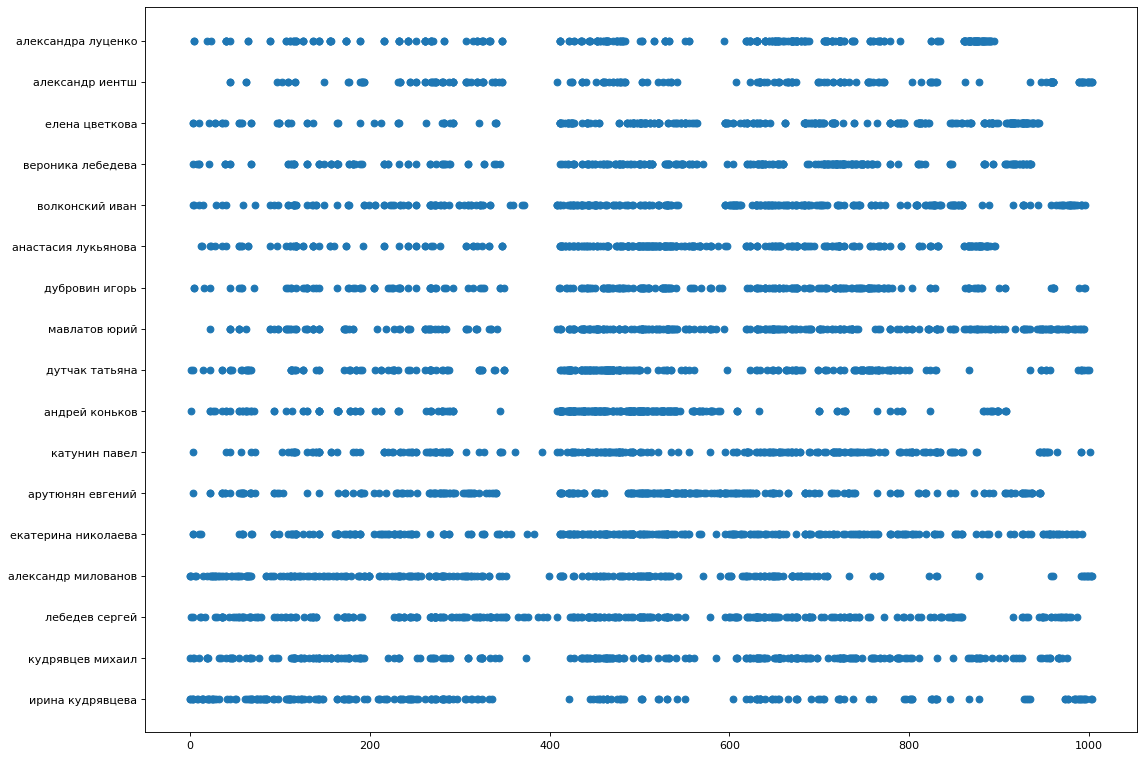

In [13]:
plt.figure(figsize=(16, 12), dpi=80)
plt.scatter(passed.syntethic_competitor_id, passed.judge_name)

#### Теперь кого не крестят

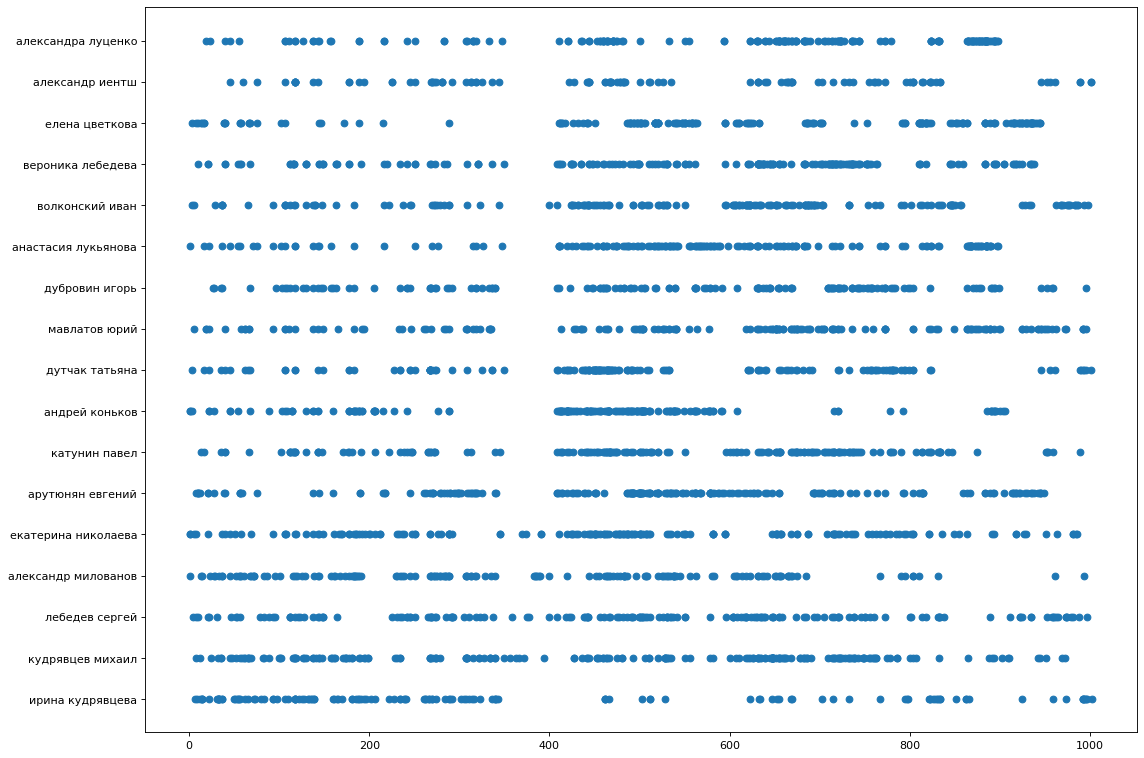

In [14]:
plt.figure(figsize=(16, 12), dpi=80)
plt.scatter(not_passed.syntethic_competitor_id, not_passed.judge_name)

## Построение модели

### Построим линейную регрессию количества крестов, полученных на турнире на отношение места участника к суммарному числу участников

#### Полный массив данных представляет собой таблицу, в которой каждая строка, в которой содержатся оценки всех судей по отношению к некоторому участнику за всю его номинацию, количество участников в этой номинации и итоговое место, которе занял участник в этой номинации

In [15]:
total_cross_based_data = model_preparation.get_total_cross_based_model_data(results) 
total_cross_based_data.head()

,волконский иван_-1,волконский иван_1,лебедев сергей_-1,лебедев сергей_1,катунин павел_-1,катунин павел_1,кудрявцев михаил_-1,кудрявцев михаил_1,дубровин игорь_-1,дубровин игорь_1,вероника лебедева_-1,вероника лебедева_1,екатерина николаева_-1,екатерина николаева_1,александр милованов_-1,александр милованов_1,ирина кудрявцева_-1,ирина кудрявцева_1,мавлатов юрий_-1,мавлатов юрий_1,александра луценко_-1,александра луценко_1,анастасия лукьянова_-1,анастасия лукьянова_1,александр иентш_-1,александр иентш_1,дутчак татьяна_-1,дутчак татьяна_1,арутюнян евгений_-1,арутюнян евгений_1,андрей коньков_-1,андрей коньков_1,елена цветкова_-1,елена цветкова_1,total_competitors,place
0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25,22.5
1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,18,13.5
2,0,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,27,3.0
3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,49,25.5
4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25,21.5


#### Полный массив данных представляет собой таблицу, в которой каждая строка, в которой содержатся суммы оценок всех судей по отношению к некоторому участнику за всю его номинацию, количество участников в этом турнире и итоговое место, которе занял данный участник

In [16]:
total_diff_based_data = model_preparation.get_total_diff_based_model_data(results)
total_diff_based_data.head()

,волконский иван,лебедев сергей,катунин павел,кудрявцев михаил,дубровин игорь,вероника лебедева,екатерина николаева,александр милованов,ирина кудрявцева,мавлатов юрий,александра луценко,анастасия лукьянова,александр иентш,дутчак татьяна,арутюнян евгений,андрей коньков,елена цветкова,total_competitors,place
0,-1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25,22.5
1,0,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,18,13.5
2,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,27,3.0
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,49,25.5
4,0,0,0,0,-1,0,0,0,0,0,0,0,0,0,0,0,0,25,21.5


#### Построим линейную регрессию на крестах

In [17]:
cross_based_regressor, cross_based_regressor_score = model.get_regression(total_cross_based_data)
diff_based_regressor, diff_based_regressor_score = model.get_regression(total_diff_based_data)

In [18]:
cross_based_regressor_score, diff_based_regressor_score

(0.5828170314224039, 0.5674163349345274)

## Интерпретация построенной модели

### Сначала интерпретируем модель на крестах 

In [19]:
cross_based_coef_data = model_interpretation.get_sorted_cross_based_model_coefs(
    cross_based_regressor, total_cross_based_data
)

#### Построим нормированные коэффициенты модели 

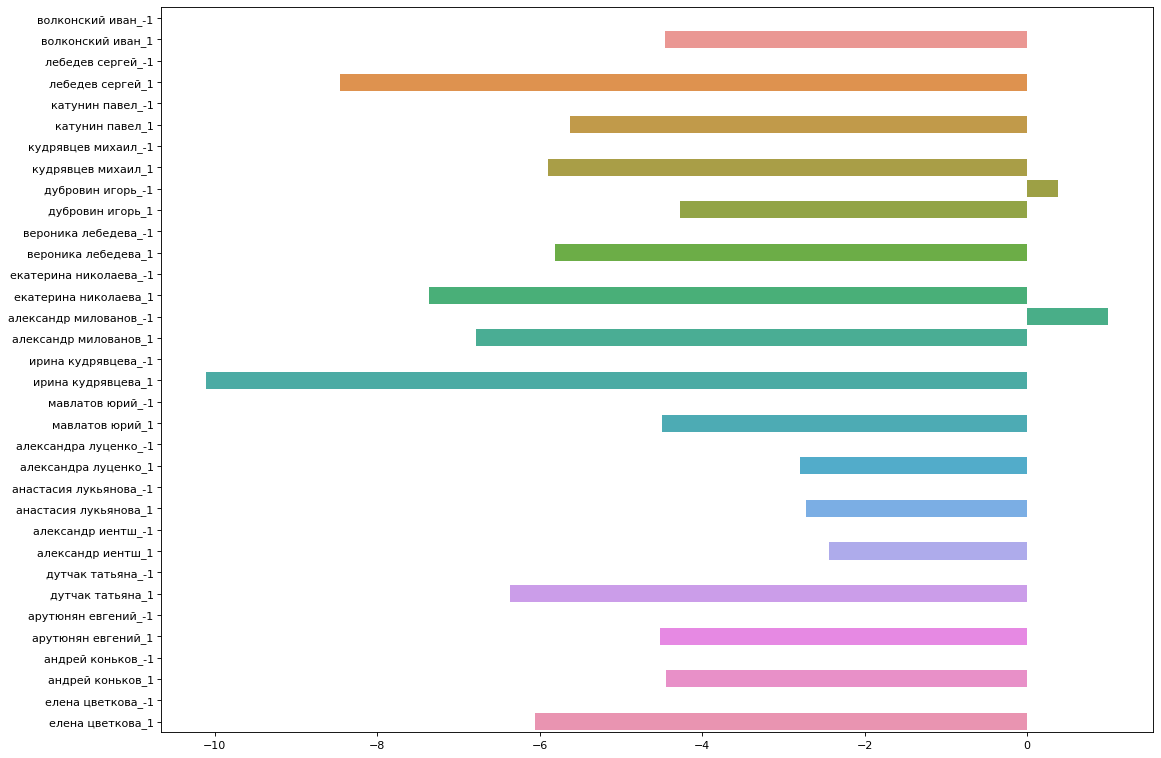

In [20]:
import seaborn as sns

plt.figure(figsize=(16, 12), dpi=80)
ax = sns.barplot(x=cross_based_coef_data.norm_coefs, y=cross_based_coef_data.labels)

#### Построим разности нормированных коэффициентов модели

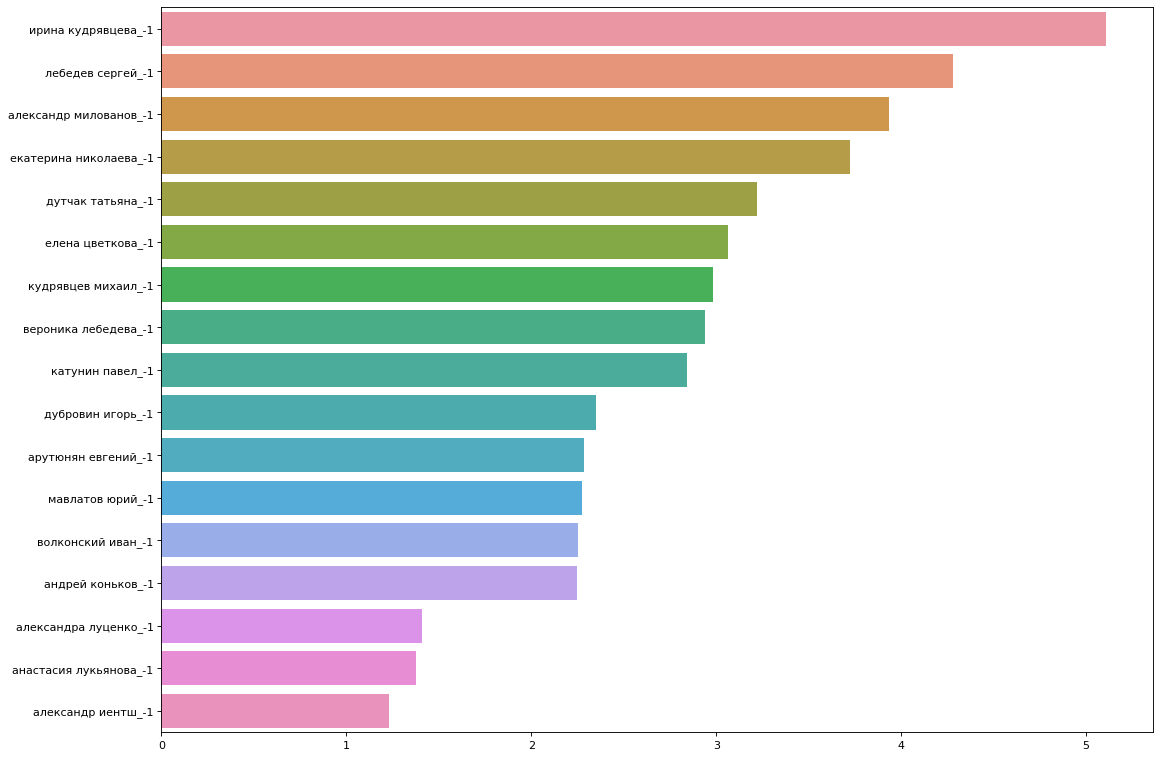

In [21]:
plt.figure(figsize=(16, 12), dpi=80)

cross_based_diff_coef_data = model_interpretation.get_diff_coef_data(cross_based_coef_data)

ax = sns.barplot(x=cross_based_diff_coef_data.coefs, y=cross_based_diff_coef_data.labels)

### Теперь интерпретируем модель на диффах 

In [22]:
diff_based_coef_data = model_interpretation.get_sorted_cross_based_model_coefs(
    diff_based_regressor, total_diff_based_data
).negate().sort()

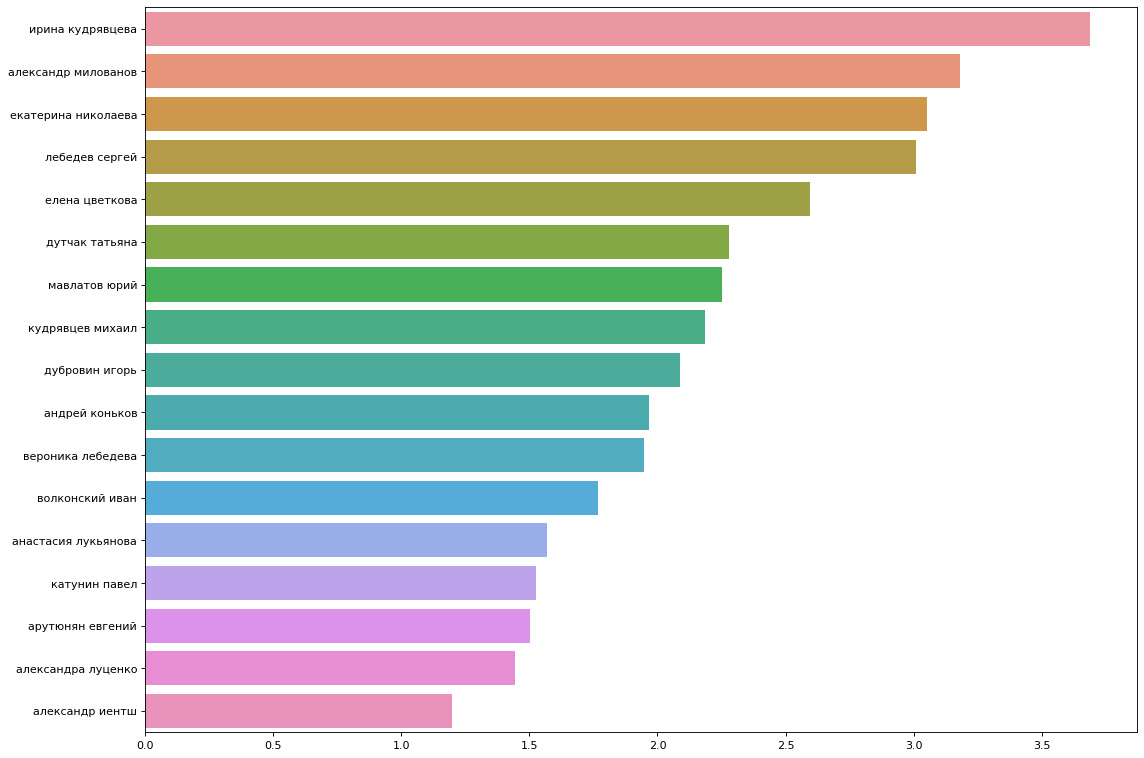

In [23]:
plt.figure(figsize=(16, 12), dpi=80)
ax = sns.barplot(x=diff_based_coef_data.coefs, y=diff_based_coef_data.labels)